In [21]:
import pandas as pd
import numpy as np
from arch import arch_model

# Load historical stock price data for all 15 companies into a dictionary
# Replace 'stock_data' with your actual data source, which can be a dictionary of DataFrames
stock_data = {
    'Asian_Paints': pd.read_csv('../ArchGarchDatasets/AsianPaints.csv', index_col=0),
    'Bharat_Petroleum': pd.read_csv('../ArchGarchDatasets/BharatPetroleum.csv', index_col=0),
    'Britannia':pd.read_csv('../ArchGarchDatasets/Britannia Industries.csv',index_col=0),
    'Cipla':pd.read_csv('../ArchGarchDatasets/Cipla.csv',index_col=0),
    'Coal_India':pd.read_csv('../ArchGarchDatasets/CoalIndia.csv',index_col=0),
    'Dr_Reddy':pd.read_csv('../ArchGarchDatasets/DrReddy.csv',index_col=0),
    'Eicher':pd.read_csv('../ArchGarchDatasets/Eicher Motors.csv',index_col=0),
    'HDFC_Bank': pd.read_csv('../ArchGarchDatasets/HdfcBank.csv', index_col=0),
    'Hero_Motocorp':pd.read_csv('../ArchGarchDatasets/HeroMotocorp.csv',index_col=0),
    'Hindalco':pd.read_csv('../ArchGarchDatasets/Hindalco.csv',index_col=0),
    'Hindustan_Unilever':pd.read_csv('../ArchGarchDatasets/HindustanUnilever.csv',index_col=0),
    'Infosys': pd.read_csv('../ArchGarchDatasets/Infosys.csv', index_col=0),
    'JSW_Steel':pd.read_csv('../ArchGarchDatasets/Jswsteel.csv', index_col=0),
    'Kotak_Mahindra':pd.read_csv('../ArchGarchDatasets/KotakMahindra.csv', index_col=0),
    "L&T":pd.read_csv('../ArchGarchDatasets/L&T.csv',index_col=0),
    'Nestle':pd.read_csv('../ArchGarchDatasets/Nestle.csv', index_col=0),
    'NTPC':pd.read_csv('../ArchGarchDatasets/NTPC.csv', index_col=0),
    'ONGC':pd.read_csv('../ArchGarchDatasets/ONGC.csv', index_col=0),
    'PowerGrid_corp':pd.read_csv('../ArchGarchDatasets/PowerGrid.csv', index_col=0),
    'Reliance_Industries':pd.read_csv('../ArchGarchDatasets/RelianceIndustries.csv', index_col=0),
    'SBI': pd.read_csv('../ArchGarchDatasets/SbiBank.csv', index_col=0),
    'Tata_Motors':pd.read_csv('../ArchGarchDatasets/TataMotors.csv', index_col=0),
    'Tata_Steel':pd.read_csv('../ArchGarchDatasets/TataSteel.csv', index_col=0),
    'Wipro':pd.read_csv('../ArchGarchDatasets/Wipro.csv', index_col=0),
}
def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q,rescale=False)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value=p
                q_value=q

    return best_aic, best_order,p_value,q_value

# Dictionary to store calculated volatilities for each company
volatility_results = {}

# Loop over each company's stock price data
actual_volatilities={}
significant_companies = []
insignificant_companies = []
for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()  
    rescaled_returns=returns
    squared_diff = rescaled_returns ** 2
    actual_volatilities[company] = squared_diff.mean()
    best_aic, best_order,p_value,q_value = select_best_order(rescaled_returns)
    print("Best AIC for:",company, best_aic)
    print("Best Order (p, q):", best_order)
    
    # Fit GARCH model
    model = arch_model(rescaled_returns, vol='Garch', p=p_value, q=q_value,rescale=False)
    fitted_model = model.fit(disp='off')  # Suppress output for simplicity

    p_values = fitted_model.pvalues
    
   
    threshold_significance = 0.05  

    if any(p_values > threshold_significance):
        insignificant_companies.append(company)
    else:
        significant_companies.append(company)

# Print the lists of significant and insignificant companies



    
    # Forecast volatility for the next 1 day
    forecast = fitted_model.forecast(horizon=1)
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1].values[0])
    
    # Store the result in the dictionary
    volatility_results[company] = forecast_volatility

# Print the dictionary containing calculated volatilities for each company
volatilities={}
print("Forecasted Volatility Results:")
for company, volatility in volatility_results.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")
print("Actual Volatility Results:")
for company, volatility in actual_volatilities.items():
    actual_volatilities[company]=volatility
    print(f"{company}: {volatility}")

# print(volatilities)
print("Companies with insignificant parameters:", significant_companies)
print("Companies with significant parameters:", insignificant_companies)




Best AIC for: Asian_Paints -1635.745356969511
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: Bharat_Petroleum -1458.7546610362697
Best Order (p, q): (2, 1)
Best AIC for: Britannia -1646.4158521778777
Best Order (p, q): (2, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: Cipla -1479.0688697309606
Best Order (p, q): (2, 4)
Best AIC for: Coal_India -1311.0624426005265
Best Order (p, q): (2, 3)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: Dr_Reddy -1593.302830321587
Best Order (p, q): (1, 3)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: Eicher -1330.8181363862655
Best Order (p, q): (1, 1)
Best AIC for: HDFC_Bank -1592.4503949445682
Best Order (p, q): (2, 2)
Best AIC for: Hero_Motocorp -1349.7699624917186
Best Order (p, q): (1, 1)
Best AIC for: Hindalco -1411.8068226856303
Best Order (p, q): (1, 1)
Best AIC for: Hindustan_Unilever -1642.3638295696073
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: Infosys -1486.3446709494624
Best Order (p, q): (4, 1)
Best AIC for: JSW_Steel -1534.5890690325255
Best Order (p, q): (1, 1)
Best AIC for: Kotak_Mahindra -1501.5978946297066
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: L&T -1415.6218565917966
Best Order (p, q): (1, 1)
Best AIC for: Nestle -1506.4688971406501
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: NTPC -1380.63603913122
Best Order (p, q): (2, 2)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: ONGC -1367.9615100378237
Best Order (p, q): (1, 1)
Best AIC for: PowerGrid_corp -1369.7711927116052
Best Order (p, q): (1, 1)
Best AIC for: Reliance_Industries -1592.7160203968256
Best Order (p, q): (2, 1)
Best AIC for: SBI -1525.2242711182569
Best Order (p, q): (1, 1)
Best AIC for: Tata_Motors -1364.6903537756134
Best Order (p, q): (1, 1)
Best AIC for: Tata_Steel -1508.5406765045084
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: Wipro -1404.4598178795688
Best Order (p, q): (1, 2)
Forecasted Volatility Results:
Asian_Paints: 0.01068319176043105
Bharat_Petroleum: 0.01691802398400044
Britannia: 0.009760031758591754
Cipla: 0.012940792819500403
Coal_India: 0.022731199815691428
Dr_Reddy: 0.013870433434172859
Eicher: 0.015325829825893086
HDFC_Bank: 0.01310097761731082
Hero_Motocorp: 0.0161331089920088
Hindalco: 0.015719356685065005
Hindustan_Unilever: 0.012158764292309459
Infosys: 0.011251837826624641
JSW_Steel: 0.013345322603930837
Kotak_Mahindra: 0.011229295673166134
L&T: 0.013646839246624201
Nestle: 0.010670751307461234
NTPC: 0.01765283393116566
ONGC: 0.01519874177649771
PowerGrid_corp: 0.020542923655907767
Reliance_Industries: 0.030008067315138526
SBI: 0.013620858958666023
Tata_Motors: 0.014573578265695962
Tata_Steel: 0.012962166062332636
Wipro: 0.018508545328969287
Actual Volatility Results:
Asian_Paints: 0.00011588706893283964
Bharat_Petroleum: 0.0002318059098691329
Britannia: 0.000112589186786173

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [23]:

def filter_by_fixed_threshold(volatility, threshold):
    return volatility <= threshold

threshold_fixed = 0.02  

filtered_companies_fixed = [company for company, vol in volatilities.items() if filter_by_fixed_threshold(vol, threshold_fixed)]

print("Filtered companies (Fixed Threshold):", filtered_companies_fixed)


Filtered companies (Fixed Threshold): ['Asian_Paints', 'Bharat_Petroleum', 'Britannia', 'Cipla', 'Dr_Reddy', 'Eicher', 'HDFC_Bank', 'Hero_Motocorp', 'Hindalco', 'Hindustan_Unilever', 'Infosys', 'JSW_Steel', 'Kotak_Mahindra', 'L&T', 'Nestle', 'NTPC', 'ONGC', 'SBI', 'Tata_Motors', 'Tata_Steel', 'Wipro']


Companies with significant parameters: []
Companies with insignificant parameters: ['Wipro']


In [68]:
# print(volatilities)
for company, volatility in volatilities.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")


Asian_Paints: 0.01068319176043105
Bharat_Petroleum: 0.01691802398400044
Cipla: 0.012940792819500403
Coal_India: 0.022731199815691428
Dr_Reddy: 0.013870433434172859
HDFC_Bank: 0.01310097761731082
Hero_Motocorp: 0.0161331089920088
Hindustan_Unilever: 0.012158764292309459
Infosys: 0.011251837826624641
JSW_Steel: 0.013345322603930837
Kotak_Mahindra: 0.011229295673166134
Nestle: 0.010670751307461234
NTPC: 0.01765283393116566
ONGC: 0.01519874177649771
PowerGrid_corp: 0.020542923655907767
Reliance_Industries: 0.030008067315138526
SBI: 0.013620858958666023
Tata_Motors: 0.014573578265695962
Tata_Steel: 0.012962166062332636
Wipro: 0.018508545328969287


In [69]:
for company, volatility in actual_volatilities.items():
    actual_volatilities[company]=volatility
    print(f"{company}: {volatility}")

Asian_Paints: 0.00011588706893283964
Bharat_Petroleum: 0.0002318059098691329
Cipla: 0.00021698424358123665
Coal_India: 0.00031412745579264943
Dr_Reddy: 0.0001386187580409325
HDFC_Bank: 0.00014690420167985004
Hero_Motocorp: 0.0002433272544825247
Hindustan_Unilever: 0.00011421587121380038
Infosys: 0.00023790470971022122
JSW_Steel: 0.00017226610089222428
Kotak_Mahindra: 0.00012663769983795766
Nestle: 0.0001243082439547932
NTPC: 0.0002236611382545911
ONGC: 0.00024522619371708016
PowerGrid_corp: 0.00023864038772482068
Reliance_Industries: 0.00014571049953273198
SBI: 0.0001803864960033607
Tata_Motors: 0.00022641579199810053
Tata_Steel: 0.0001898144964606074
Wipro: 0.00020238079855659232


In [71]:
import numpy as np
rmse_per_company = {}
for company in volatilities.keys():
    # Calculate squared difference
    squared_diff = (volatilities[company] - actual_volatilities[company]) ** 2
    # Calculate RMSE
    rmse_per_company[company] = np.sqrt(squared_diff)

# Display RMSE for each company
print("Root Mean Square Error Results :")
for company, rmse in rmse_per_company.items():
    print(f"{company}: {rmse}")

Root Mean Square Error Results :
Asian_Paints: 0.01056730469149821
Bharat_Petroleum: 0.016686218074131308
Cipla: 0.012723808575919166
Coal_India: 0.022417072359898777
Dr_Reddy: 0.013731814676131927
HDFC_Bank: 0.01295407341563097
Hero_Motocorp: 0.01588978173752628
Hindustan_Unilever: 0.012044548421095659
Infosys: 0.01101393311691442
JSW_Steel: 0.013173056503038613
Kotak_Mahindra: 0.011102657973328177
Nestle: 0.01054644306350644
NTPC: 0.01742917279291107
ONGC: 0.01495351558278063
PowerGrid_corp: 0.020304283268182947
Reliance_Industries: 0.029862356815605794
SBI: 0.013440472462662662
Tata_Motors: 0.014347162473697862
Tata_Steel: 0.01277235156587203
Wipro: 0.018306164530412696


In [73]:
# Assuming a risk-free rate
risk_free_rate = 0.05  # 5% annual risk-free rate

# Assuming a market risk premium
market_risk_premium = 0.08  # 8% annual market risk premium

# Calculating expected returns using CAPM
expected_returns = {}
for stock, volatility in volatilities.items():
    beta = 1.0  # Assuming beta of 1 for simplicity
    expected_return = risk_free_rate + beta * market_risk_premium * volatility
    expected_returns[stock] = expected_return

# Display expected returns
for stock, expected_return in expected_returns.items():
    print(f"{stock}: {expected_return}")

Asian_Paints: 0.050854655340834484
Bharat_Petroleum: 0.05135344191872004
Cipla: 0.051035263425560036
Coal_India: 0.051818495985255314
Dr_Reddy: 0.05110963467473383
HDFC_Bank: 0.05104807820938487
Hero_Motocorp: 0.051290648719360704
Hindustan_Unilever: 0.05097270114338476
Infosys: 0.05090014702612997
JSW_Steel: 0.05106762580831447
Kotak_Mahindra: 0.0508983436538533
Nestle: 0.0508536601045969
NTPC: 0.051412226714493255
ONGC: 0.05121589934211982
PowerGrid_corp: 0.051643433892472626
Reliance_Industries: 0.05240064538521109
SBI: 0.051089668716693286
Tata_Motors: 0.05116588626125568
Tata_Steel: 0.05103697328498662
Wipro: 0.051480683626317546


In [74]:
import numpy as np
import cvxpy as cp

num_stocks = len(volatilities)

print(num_stocks)
weights = cp.Variable(num_stocks)
print(weights)

20
var1881


In [75]:
portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(volatilities.values()))))
print(portfolio_volatility)

power(QuadForm(var1881, [[0.01 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)


In [76]:
constraints = [cp.sum(weights) == 1, weights >= 0]

# Create optimization problem
problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
print(problem)

minimize power(QuadForm(var1881, [[0.01 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
subject to Sum(var1881, None, False) == 1.0
           0.0 <= var1881


In [77]:
problem.solve(qcp=True)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvx

0.027517668034497893

In [78]:
optimized_weights = weights.value
final_optimized_weight={}
for i, stock in enumerate(volatilities.keys()):
    final_optimized_weight[stock]=optimized_weights[i]
    print(f"{stock}: {optimized_weights[i]}")



Asian_Paints: 0.05205708086358082
Bharat_Petroleum: 0.04915047538789527
Cipla: 0.05079108474781186
Coal_India: 0.047495680709711045
Dr_Reddy: 0.05035258162335159
HDFC_Bank: 0.05071259025335446
Hero_Motocorp: 0.04943107063476567
Hindustan_Unilever: 0.05119378398292494
Infosys: 0.051706480528764365
JSW_Steel: 0.050595283741862805
Kotak_Mahindra: 0.05171992341902544
Nestle: 0.0520650296271299
NTPC: 0.04890289021523939
ONGC: 0.04978953011475806
PowerGrid_corp: 0.04804609602389359
Reliance_Industries: 0.046066364013703606
SBI: 0.05046638225345305
Tata_Motors: 0.05004605153423594
Tata_Steel: 0.05078053673635692
Wipro: 0.048631083588181336


In [80]:
# Calculate portfolio risk contribution
portfolio_risk_contribution = {stock: optimized_weights[i] * volatilities[stock] for i, stock in enumerate(volatilities.keys())}

# Display portfolio composition
print("Portfolio Composition:")
for stock, weight in zip(volatilities.keys(), optimized_weights):
    print(f"{stock}: {weight * 100:.2f}%")

# Display portfolio risk contribution
print("\nPortfolio Risk Contribution:")
for stock, risk_contribution in portfolio_risk_contribution.items():
    print(f"{stock}: {risk_contribution * 100:.2f}%")

# Calculate and display total portfolio risk
portfolio_risk = sum(portfolio_risk_contribution.values())
print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")


Portfolio Composition:
Asian_Paints: 5.21%
Bharat_Petroleum: 4.92%
Cipla: 5.08%
Coal_India: 4.75%
Dr_Reddy: 5.04%
HDFC_Bank: 5.07%
Hero_Motocorp: 4.94%
Hindustan_Unilever: 5.12%
Infosys: 5.17%
JSW_Steel: 5.06%
Kotak_Mahindra: 5.17%
Nestle: 5.21%
NTPC: 4.89%
ONGC: 4.98%
PowerGrid_corp: 4.80%
Reliance_Industries: 4.61%
SBI: 5.05%
Tata_Motors: 5.00%
Tata_Steel: 5.08%
Wipro: 4.86%

Portfolio Risk Contribution:
Asian_Paints: 0.06%
Bharat_Petroleum: 0.08%
Cipla: 0.07%
Coal_India: 0.11%
Dr_Reddy: 0.07%
HDFC_Bank: 0.07%
Hero_Motocorp: 0.08%
Hindustan_Unilever: 0.06%
Infosys: 0.06%
JSW_Steel: 0.07%
Kotak_Mahindra: 0.06%
Nestle: 0.06%
NTPC: 0.09%
ONGC: 0.08%
PowerGrid_corp: 0.10%
Reliance_Industries: 0.14%
SBI: 0.07%
Tata_Motors: 0.07%
Tata_Steel: 0.07%
Wipro: 0.09%

Total Portfolio Risk: 1.53%


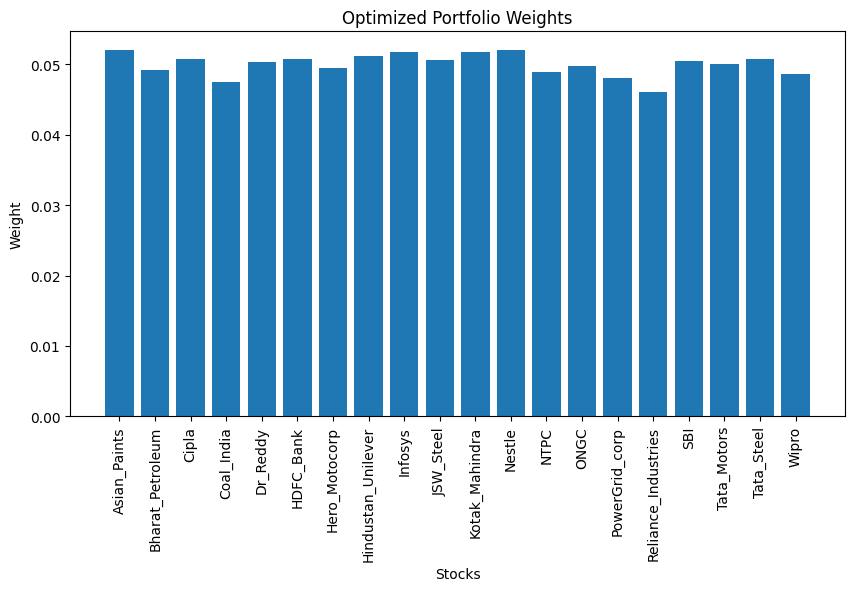

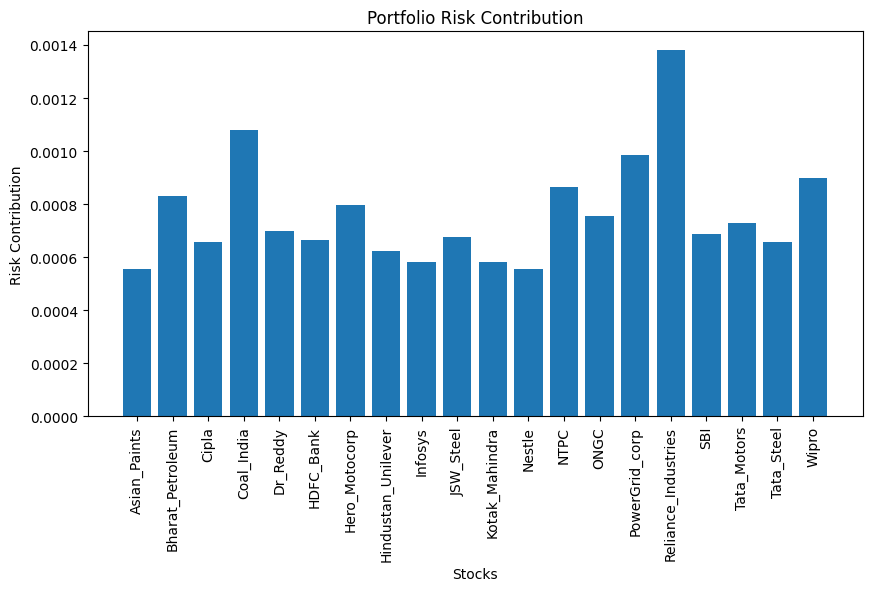

In [81]:
import matplotlib.pyplot as plt

# Plotting optimized weights
plt.figure(figsize=(10, 5))
plt.bar(volatilities.keys(), optimized_weights)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

# Plotting portfolio risk contribution
plt.figure(figsize=(10, 5))
plt.bar(portfolio_risk_contribution.keys(), portfolio_risk_contribution.values())
plt.title('Portfolio Risk Contribution')
plt.xlabel('Stocks')
plt.ylabel('Risk Contribution')
plt.xticks(rotation=90)
plt.show()


In [82]:
# Assuming a risk-free rate
risk_free_rate = 0.05  # 5% annual risk-free rate

# Assuming a market risk premium
market_risk_premium = 0.08  # 8% annual market risk premium

# Calculating expected returns using CAPM
expected_returns = {}
for stock, volatility in volatilities.items():
    beta = 1.0  # Assuming beta of 1 for simplicity
    expected_return = risk_free_rate + beta * market_risk_premium * volatility
    expected_returns[stock] = expected_return

# Display expected returns
for stock, expected_return in expected_returns.items():
    print(f"{stock}: {expected_return}")


Asian_Paints: 0.050854655340834484
Bharat_Petroleum: 0.05135344191872004
Cipla: 0.051035263425560036
Coal_India: 0.051818495985255314
Dr_Reddy: 0.05110963467473383
HDFC_Bank: 0.05104807820938487
Hero_Motocorp: 0.051290648719360704
Hindustan_Unilever: 0.05097270114338476
Infosys: 0.05090014702612997
JSW_Steel: 0.05106762580831447
Kotak_Mahindra: 0.0508983436538533
Nestle: 0.0508536601045969
NTPC: 0.051412226714493255
ONGC: 0.05121589934211982
PowerGrid_corp: 0.051643433892472626
Reliance_Industries: 0.05240064538521109
SBI: 0.051089668716693286
Tata_Motors: 0.05116588626125568
Tata_Steel: 0.05103697328498662
Wipro: 0.051480683626317546


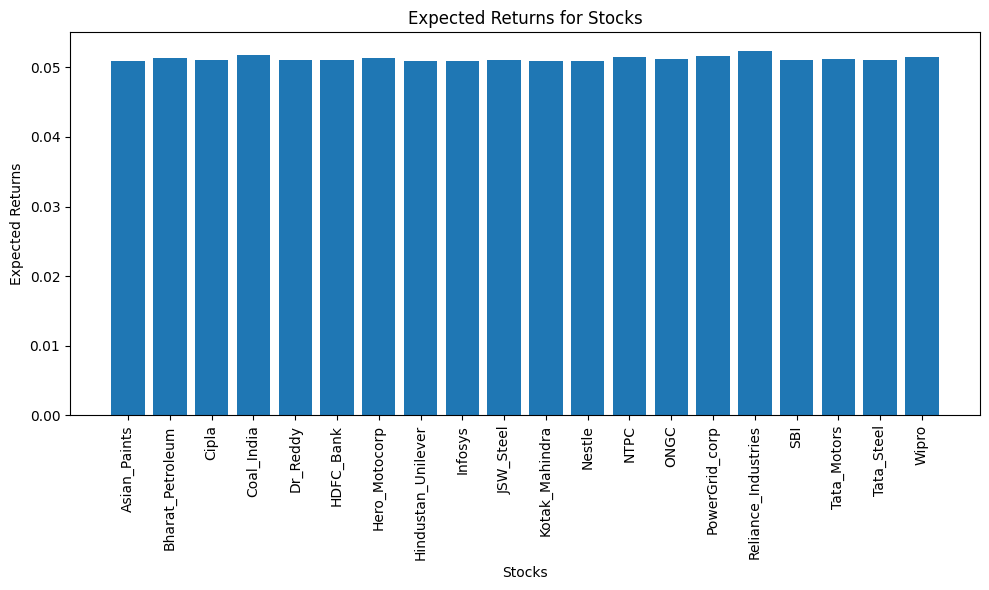

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(expected_returns.keys(), expected_returns.values())
plt.xlabel('Stocks')
plt.ylabel('Expected Returns')
plt.title('Expected Returns for Stocks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
risk_free_rate = 0.05  # 5% annual risk-free rate

# Calculate portfolio expected return
portfolio_expected_return = sum(final_optimized_weight[stock] * expected_returns[stock] for stock in final_optimized_weight)

# Calculate portfolio volatility (standard deviation)
# Assuming you have calculated portfolio volatility using covariance matrix or GARCH model
portfolio_volatility =0.01# Replace with actual portfolio volatility

# Calculate Sharpe ratio
sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility

print("Portfolio Expected Return:", portfolio_expected_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Portfolio Expected Return: 0.05122120809628885
Portfolio Volatility: 0.01
Sharpe Ratio: 0.12212080962888464


In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert the dictionary to a DataFrame
# df=np.array(final_optimized_weight.values())
# # correlation_matrix = np.corrcoef(final_optimized_weight.values())

# # Calculate the correlation matrix
# corr_matrix = np.corrcoef(df)

# # Plot the correlation matrix
# # Plot the heatmap using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=range(1, 10 + 1), yticklabels=range(1, 10 + 1))
# plt.title("Correlation Matrix Heatmap")
# plt.show()

print(final_optimized_weight.values())
my_array = np.array(list(final_optimized_weight.values()))
print(my_array)
print(type(my_array))

my_array=my_array.T

corr_matrix = my_array.corr()
print(corr_matrix)

# Plot the correlation matrix
# Plot the heatmap using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=range(1, 20 + 1), yticklabels=range(1, 20 + 1))
# plt.title("Correlation Matrix Heatmap")
# plt.show()


dict_values([0.05205708086358082, 0.04915047538789527, 0.05079108474781186, 0.047495680709711045, 0.05035258162335159, 0.05071259025335446, 0.04943107063476567, 0.05119378398292494, 0.051706480528764365, 0.050595283741862805, 0.05171992341902544, 0.0520650296271299, 0.04890289021523939, 0.04978953011475806, 0.04804609602389359, 0.046066364013703606, 0.05046638225345305, 0.05004605153423594, 0.05078053673635692, 0.048631083588181336])
[0.05205708 0.04915048 0.05079108 0.04749568 0.05035258 0.05071259
 0.04943107 0.05119378 0.05170648 0.05059528 0.05171992 0.05206503
 0.04890289 0.04978953 0.0480461  0.04606636 0.05046638 0.05004605
 0.05078054 0.04863108]
<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'corr'